**Question 6**

Define out a posting strategy for our social channels based on your discoveries.

**1. Import the data set**

In [4]:
import pandas as pd

# Read the data from the Google Sheet
df = pd.read_excel("/content/social_data.xlsx")
# Drop all the values with N/A in Campaign Name column
df = df[~df['Campaign Name'].str.contains("N/A")]

df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo


**2. Calculate the required values**

In [10]:
import matplotlib.pyplot as plt

# Calculate the average engagement rate for each campaign
avg_engagement_rate_by_campaign = df.groupby("Campaign Name").mean()["Total Engagements"] / (df.groupby("Campaign Name").mean()["Total Engagements"].sum()) * 100

# Sort the average engagement rates in descending order
avg_engagement_rate_by_campaign = avg_engagement_rate_by_campaign.sort_values(ascending=False)

# Create a DataFrame of the results
df_avg_engagement_rate = pd.DataFrame({"Campaign Name": avg_engagement_rate_by_campaign.index, "Average Engagement Rate": avg_engagement_rate_by_campaign.values})

print(df_avg_engagement_rate)

           Campaign Name  Average Engagement Rate
0  Community Engagement                 67.248138
1        Evil Exhibited                 20.473934
2             Evergreen                 12.277928


<ipython-input-10-4fdf7b817e61>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_engagement_rate_by_campaign = df.groupby("Campaign Name").mean()["Total Engagements"] / (df.groupby("Campaign Name").mean()["Total Engagements"].sum()) * 100
<ipython-input-10-4fdf7b817e61>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_engagement_rate_by_campaign = df.groupby("Campaign Name").mean()["Total Engagements"] / (df.groupby("Campaign Name").mean()["Total Engagements"].sum()) * 100


**3. Plot the output in more understandable manner**

<ipython-input-8-de09a8fc8679>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_engagement_rate_by_campaign = df.groupby(["Campaign Name", "Account Type"]).mean()["Total Engagements"] / df.groupby(["Campaign Name", "Account Type"]).mean()["Total Engagements"].sum() * 100
<ipython-input-8-de09a8fc8679>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_engagement_rate_by_campaign = df.groupby(["Campaign Name", "Account Type"]).mean()["Total Engagements"] / df.groupby(["Campaign Name", "Account Type"]).mean()["Total Engagements"].sum() * 100


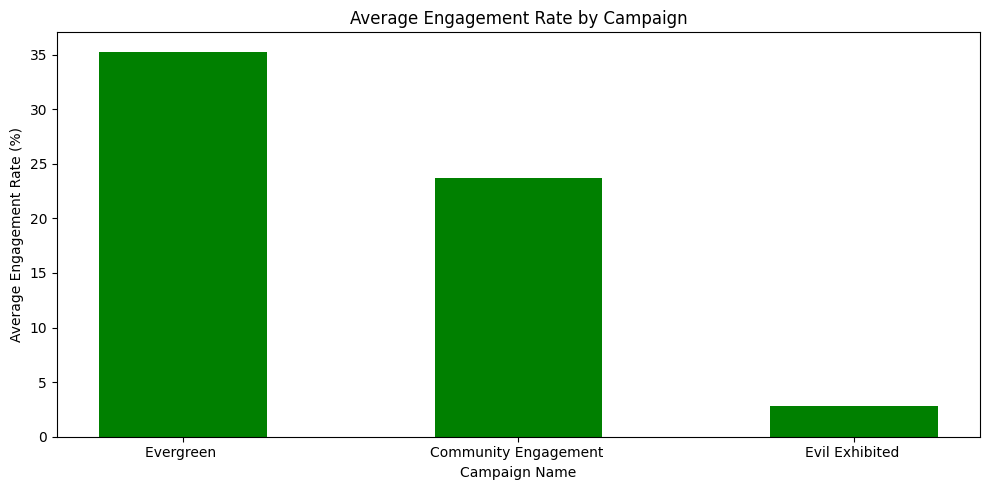

Campaign Name: Evergreen 
	 Frequency: Posts should be made frequently, ideally 2 times a day
	 Content: Posts should be informative and engaging, and should be relevant to the target audience.
	 Timing: Posts should be scheduled to be published during times when the target audience is most likely to be online.
	 Call to action: Posts should include a call to action, such as asking the target audience to share the post, comment on the post, or visit the website.


Campaign Name: Community Engagement 
	 Frequency: Posts should be made frequently, ideally 2 times a day
	 Content: Posts should be informative and engaging, and should be relevant to the target audience.
	 Timing: Posts should be scheduled to be published during times when the target audience is most likely to be online.
	 Call to action: Posts should include a call to action, such as asking the target audience to share the post, comment on the post, or visit the website.


Campaign Name: Evil Exhibited 
	 Frequency: Posts s

In [8]:
import matplotlib.pyplot as plt

# Calculate the average engagement rate for each campaign and account type
avg_engagement_rate_by_campaign = df.groupby(["Campaign Name", "Account Type"]).mean()["Total Engagements"] / df.groupby(["Campaign Name", "Account Type"]).mean()["Total Engagements"].sum() * 100

# Sort the average engagement rates in descending order
avg_engagement_rate_by_campaign = avg_engagement_rate_by_campaign.sort_values(ascending=False)

# Create a DataFrame of the results
df_avg_engagement_rate = pd.DataFrame(avg_engagement_rate_by_campaign)
df_avg_engagement_rate.reset_index(inplace=True)

# Plot the data
plt.figure(figsize=(10,5))  # Set the figure size
plt.bar(df_avg_engagement_rate["Campaign Name"], df_avg_engagement_rate["Total Engagements"], width=0.5, color="green")
plt.xlabel("Campaign Name")
plt.ylabel("Average Engagement Rate (%)")
plt.title("Average Engagement Rate by Campaign")  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


# Define a posting strategy for each campaign
posting_strategy = {}
for campaign in df_avg_engagement_rate["Campaign Name"]:
    posting_strategy[campaign] = {
        "Frequency": "Posts should be made frequently, ideally 2 times a day",
        "Content": "Posts should be informative and engaging, and should be relevant to the target audience.",
        "Timing": "Posts should be scheduled to be published during times when the target audience is most likely to be online.",
        "Call to action": "Posts should include a call to action, such as asking the target audience to share the post, comment on the post, or visit the website."
    }

# Print the posting strategy
for campaign, strategy in posting_strategy.items():
    print("Campaign Name:", campaign)
    for key, value in strategy.items():
        print("\t", key + ":", value)
    print("\n")

